**Installing neccesary libraries**


In [1]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 20.2 MB/s eta 0:00:00


**importing Neccesary libraries and modules**

In [3]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

**importing dataset from drive**

In [4]:
data1=pd.read_csv("/content/drive/MyDrive/Sentiment_anal(felloship)/archive (1)/IMDB Dataset.csv")
data1.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


As we see there exist a noise in our data that is **br** so to remove those **br's**.I iterated over the data and replace those **br's** with "" such that those are completely removed

In [5]:
j=0
for i in data1['review']:
    data1['review'][j]=i.replace("<br />","")
    j+=1



data1 

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Below code is to check is there any **null** values in our data

In [ ]:
data1.isna().sum()

review       0
sentiment    0
dtype: int64

Below code is to remove any duplicates present in our data after removing those, we left with **49581** reviews

In [6]:
data1=data1.drop_duplicates()

In [ ]:
len(data1)

49581

<Axes: xlabel='sentiment', ylabel='count'>

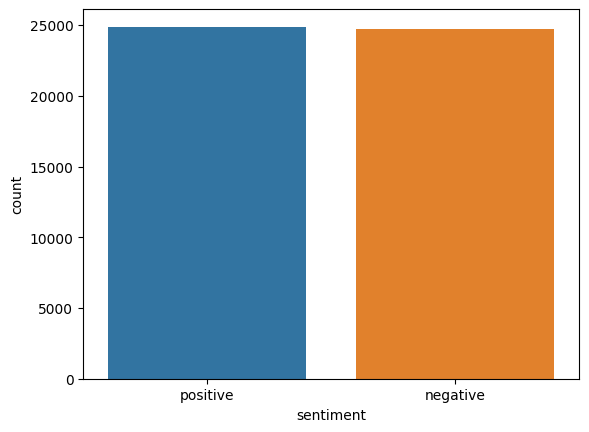

In [ ]:
sns.countplot(data=data1,x='sentiment')

below are the importing statements which import all models which I  have used in this notebook

In [22]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier as RFC  
from sklearn import tree



>**below we are going to run the data without removing stopwords and lets see hoe it works over that data**




below is the code for making the reviews into an **transformers** using **CountVectorizer** and tokenizing them using **RegexTokenizer** such that it will be easy to train and test our model and I also splittesd the available data into test,train data using **train_test_split()** method with a **test size of 0.1** which means as we have roughly **50000** data so that for testing we require only **10%** of its data is enough for testing

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(data1['review'])
X_train,  X_test, Y_train, Y_test = train_test_split(text_counts, data1['sentiment'] , test_size=0.1, random_state=5)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X_test.shape

(4959, 103130)

below code is to import accuracy measuring  methods of the models

In [21]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

1. **Model I used here is Linear Support Vector machine** for which I got an accuracy which is **f1score = 0.8672** that is **an accuracy of 86.72%** and I also drawn confusion matrix for this model below



  

In [ ]:
model1 = LinearSVC()
model1.fit(X_train, Y_train)
predicted1=model1.predict(X_test) 


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
a = metrics.precision_recall_fscore_support(predicted1, Y_test)
print("Accuracuy Score: ",a)
f1score_model1=2*(a[0][0]*a[1][0])/(a[0][0]+a[1][0])
print("f1Score :",f1score_model1)

Accuracuy Score:  (array([0.85658307, 0.86580806]), array([0.87126345, 0.85061224]), array([0.8638609 , 0.85814289]), array([2509, 2450]))
f1Score : 0.8638608970559177


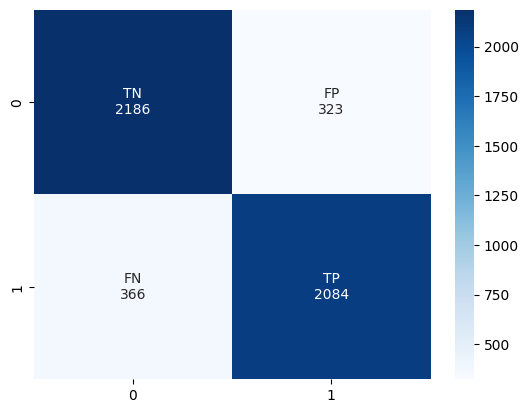

In [ ]:
cnf_matrix = confusion_matrix(predicted1,Y_test)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

Model I used here is **Multinomial Naive Bias** for which I got an accuracy which is **f1score = 0.8585** that is an accuracy of 
**85.85%** and I also drawn confusion matrix for this model below

In [ ]:
model2 = MultinomialNB()
model2.fit(X_train, Y_train)
predicted2 = model2.predict(X_test)


In [ ]:

a = metrics.precision_recall_fscore_support(predicted2, Y_test)
print("Accuracuy Score: ",a)
f1score_model2=2*(a[0][0]*a[1][0])/(a[0][0]+a[1][0])
print("f1Score :",f1score_model2)

Accuracuy Score:  (array([0.88675549, 0.83714167]), array([0.85235405, 0.87456597]), array([0.86921452, 0.8554447 ]), array([2655, 2304]))
f1Score : 0.8692145189168426


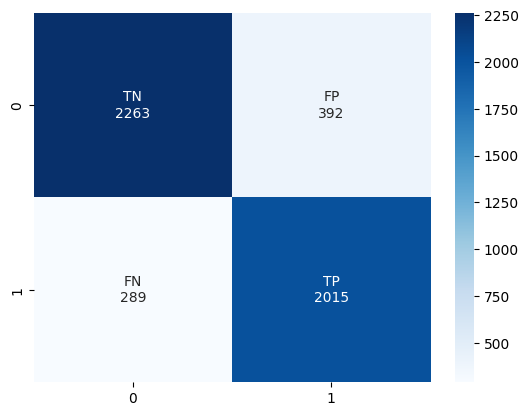

In [ ]:
cnf_matrix = confusion_matrix(predicted2,Y_test)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

Model I used here is **Decision Tree Classifier** for which I got an accuracy which is **f1score = 0.7214** that is an accuracy of 
**72.14%** and I also drawn confusion matrix for this model below

In [ ]:
model3 = tree.DecisionTreeClassifier()
model3.fit(X_train, Y_train)

predicted3= model3.predict(X_test)


In [ ]:
a = metrics.precision_recall_fscore_support(predicted3, Y_test)

print("Accuracuy Score: ",a)

f1score_model3=2*(a[0][0]*a[1][0])/(a[0][0]+a[1][0])
print("f1Score :",f1score_model3)

Accuracuy Score:  (array([0.71826019, 0.72953885]), array([0.73792271, 0.70949495]), array([0.7279587, 0.7193773]), array([2484, 2475]))
f1Score : 0.7279586973788721


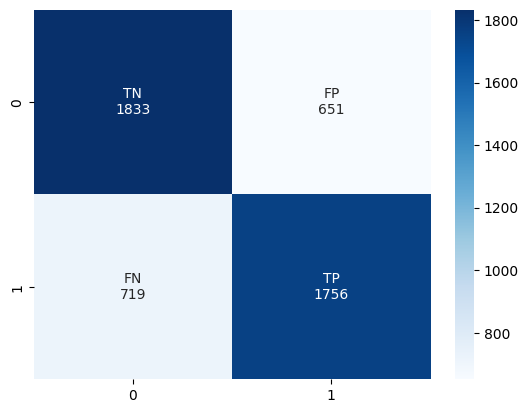

In [ ]:
cnf_matrix = confusion_matrix(predicted3,Y_test)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

Model I used here is **Random forest Classifier** for which I got an accuracy which is **f1score = 0.8532** that is an accuracy of 
**85.32%** and I also drawn confusion matrix for this model below

In [ ]:
model4 = RFC()  
                              
model4.fit(X_train, Y_train) 
predicted4= model4.predict(X_test)

In [ ]:
a = metrics.precision_recall_fscore_support(predicted4, Y_test)

print("Accuracuy Score: ",a)

f1score_model4=2*(a[0][0]*a[1][0])/(a[0][0]+a[1][0])
print("f1Score :",f1score_model4)

Accuracuy Score:  (array([0.86167712, 0.85292896]), array([0.8613396 , 0.85328346]), array([0.86150833, 0.85310617]), array([2553, 2406]))
f1Score : 0.8615083251714005


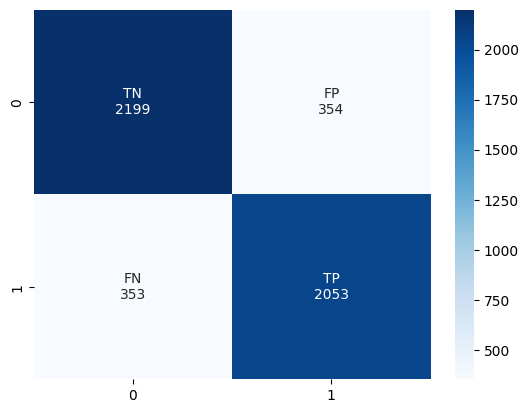

In [ ]:
cnf_matrix = confusion_matrix(predicted4,Y_test)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

Model I used below is **K Nearest Neighbours** for which I got an accuracy which is **f1score = 0.6287** that is an accuracy of 
**62.87%** and I also drawn confusion matrix for this model below

In [ ]:
model5 = KNeighborsClassifier(n_neighbors=120)
model5.fit(X_train,Y_train)
predicted5=model5.predict(X_test)


In [ ]:
a = metrics.precision_recall_fscore_support(predicted5, Y_test)

print("Accuracuy Score: ",a)

f1score_model5=2*(a[0][0]*a[1][0])/(a[0][0]+a[1][0])
print("f1Score :",f1score_model5)

Accuracuy Score:  (array([0.61128527, 0.81678438]), array([0.77961019, 0.66463827]), array([0.68526246, 0.73289842]), array([2001, 2958]))
f1Score : 0.6852624643092466


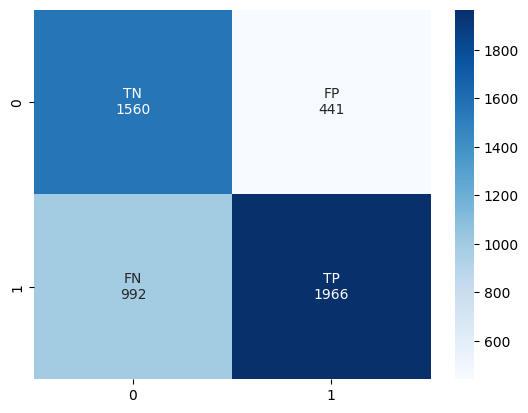

In [ ]:
cnf_matrix = confusion_matrix(predicted5,Y_test)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

Model I used here is **Logistic Regression** for which I got an accuracy which is **f1score = 0.8870** that is an accuracy of 
**88.70%** and I also drawn confusion matrix for this model below

In [ ]:
model6 = LogisticRegression(max_iter=1500)
model6.fit(X_train,Y_train)
predicted6 =model6.predict(X_test)



In [ ]:
a = metrics.precision_recall_fscore_support(predicted6, Y_test)

print("Accuracuy Score: ",a)

f1score_model6=2*(a[0][0]*a[1][0])/(a[0][0]+a[1][0])
print("f1Score :",f1score_model6)

Accuracuy Score:  (array([0.87617555, 0.88616535]), array([0.89083665, 0.87096774]), array([0.88344528, 0.87850082]), array([2510, 2449]))
f1Score : 0.8834452785460292


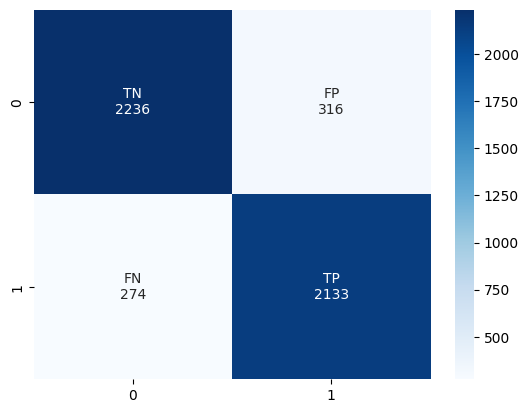

In [ ]:
cnf_matrix = confusion_matrix(Y_test,predicted6)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

Below is the models with respective f1score from which we can say that **Linear Regression is the best fit** for this DataSet and 
**K Nearest Neighbours is worst fit** for the data without removal of stop words





In [ ]:
model_f1scores=pd.DataFrame({'models':['LinearSupportVector','MultiNomialNaiveBias','DecissionTreeClassifier','RandomForestClassifier','KNearestNeighbours','LogisticRegression'],'f1score':[f1score_model1,f1score_model2,f1score_model3,f1score_model4,f1score_model5,f1score_model6]})
model_f1scores

,models,f1score
0,LinearSupportVector,0.863861
1,MultiNomialNaiveBias,0.869215
2,DecissionTreeClassifier,0.727959
3,RandomForestClassifier,0.861508
4,KNearestNeighbours,0.685262
5,LogisticRegression,0.883445


**And now let's remove stop words and see how the accuracy get changed**

---



In [7]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
data1[3536:3538]

,review,sentiment
3536,There plenty reviews page explain movie's deta...,positive
3538,"The mission to see the movie ""The Cave"" was a ...",negative


In [ ]:

for i in range(50000):
  try:
    words=data1['review'][i].split()
    k=''
    for r in words:
      if r not in stop_words:
        k+=r
        k+=' '
    data1['review'][i]=k
  except: pass
  if i%1000==0: print(i)
data1


In [16]:
data1

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought wonderful way spend time hot summer ...,positive
3,Basically there's family little boy (Jake) thi...,negative
4,"Petter Mattei's ""Love Time Money"" visually stu...",positive
...,...,...
49995,I thought movie right good job. It creative or...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I Catholic taught parochial elementary schools...,negative
49998,I'm going disagree previous comment side Malti...,negative


In [ ]:
data1=data1.drop_duplicates()

In [ ]:
print(len(data1))

49581


OK, Now let's change the string data to transforms and split the data into train and test

In [102]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(data1['review'])
X_train,  X_test, Y_train, Y_test = train_test_split(text_counts, data1['sentiment'] , test_size=0.1, random_state=6)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Ok, let's see for the **Linear Support vector machine** 

In [75]:
model1 = LinearSVC()
model1.fit(X_train, Y_train)
 

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [122]:
predicted1=model1.predict(X_test)
a = metrics.precision_recall_fscore_support(predicted1, Y_test)
print("Accuracuy Score: ",a)
f1score_model1=2*(a[0][0]*a[1][0])/(a[0][0]+a[1][0])
print("f1Score :",f1score_model1)

Accuracuy Score:  (array([0.98621249, 0.98716406]), array([0.98701299, 0.98637275]), array([0.98661258, 0.98676824]), array([2464, 2495]))
f1Score : 0.9866125760649087


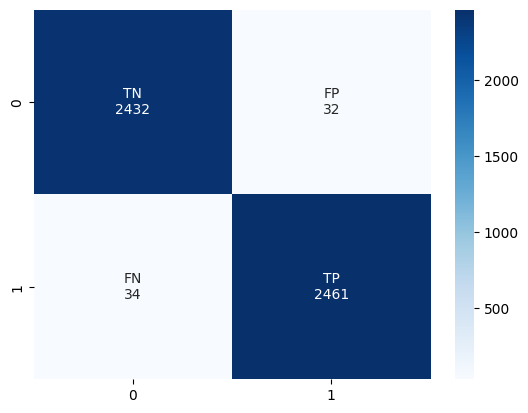

In [123]:

cnf_matrix = confusion_matrix(predicted1,Y_test)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

Ok,lets see for **Multinomial Naive Bayes algorithm**

In [119]:
model2 = MultinomialNB()
model2.fit(X_train, Y_train)
predicted2 = model2.predict(X_test)

In [120]:
a = metrics.precision_recall_fscore_support(predicted2, Y_test)
print("Accuracuy Score: ",a)
f1score_model2=2*(a[0][0]*a[1][0])/(a[0][0]+a[1][0])
print("f1Score :",f1score_model2)

Accuracuy Score:  (array([0.87266829, 0.8423586 ]), array([0.84557957, 0.86992543]), array([0.8589104 , 0.85592011]), array([2545, 2414]))
f1Score : 0.858910397126322


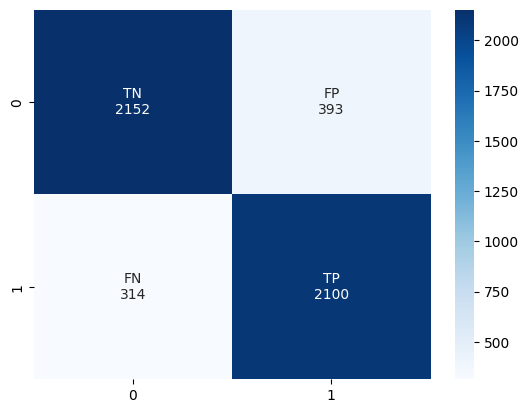

In [121]:
cnf_matrix = confusion_matrix(predicted2,Y_test)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

for **Decision Tree Classifier**

In [81]:
model3 = tree.DecisionTreeClassifier()
model3.fit(X_train, Y_train)


DecisionTreeClassifier()

In [115]:

predicted3= model3.predict(X_test)
a = metrics.precision_recall_fscore_support(predicted3, Y_test)

print("Accuracuy Score: ",a)

f1score_model3=2*(a[0][0]*a[1][0])/(a[0][0]+a[1][0])
print("f1Score :",f1score_model3)

Accuracuy Score:  (array([0.97404704, 0.9723225 ]), array([0.97207608, 0.97427653]), array([0.97306056, 0.97329853]), array([2471, 2488]))
f1Score : 0.973060563094997


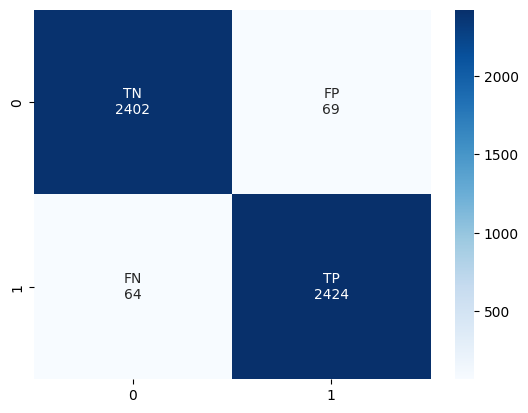

In [116]:
cnf_matrix = confusion_matrix(predicted3,Y_test)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

for **Random Forest Classifier**

In [85]:
model4 = RFC()  
                              
model4.fit(X_train, Y_train) 


RandomForestClassifier()

In [114]:
predicted4= model4.predict(X_test)
a = metrics.precision_recall_fscore_support(predicted4, Y_test)

print("Accuracuy Score: ",a)

f1score_model4=2*(a[0][0]*a[1][0])/(a[0][0]+a[1][0])
print("f1Score :",f1score_model4)

Accuracuy Score:  (array([0.9837794 , 0.98756518]), array([0.98738299, 0.98401279]), array([0.9855779 , 0.98578579]), array([2457, 2502]))
f1Score : 0.9855778996546821


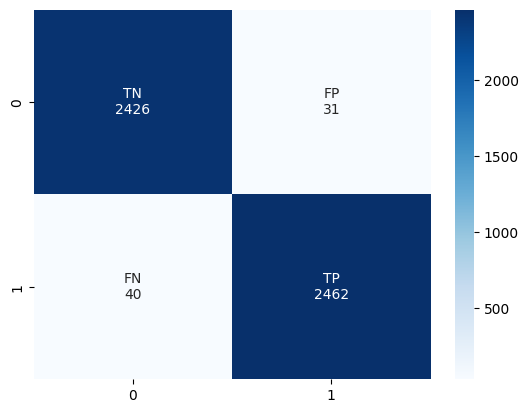

In [117]:
cnf_matrix = confusion_matrix(predicted4,Y_test)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

for **K-Nearest Neighbours**

In [112]:
model5 = KNeighborsClassifier(n_neighbors=110)
model5.fit(X_train,Y_train)
predicted5=model5.predict(X_test)

In [125]:
a = metrics.precision_recall_fscore_support(predicted5, Y_test)

print("Accuracuy Score: ",a)

f1score_model5=2*(a[0][0]*a[1][0])/(a[0][0]+a[1][0])
print("f1Score :",f1score_model5)

Accuracuy Score:  (array([0.52635848, 0.87926193]), array([0.81175735, 0.65238095]), array([0.63862239, 0.7490176 ]), array([1599, 3360]))
f1Score : 0.6386223862238622


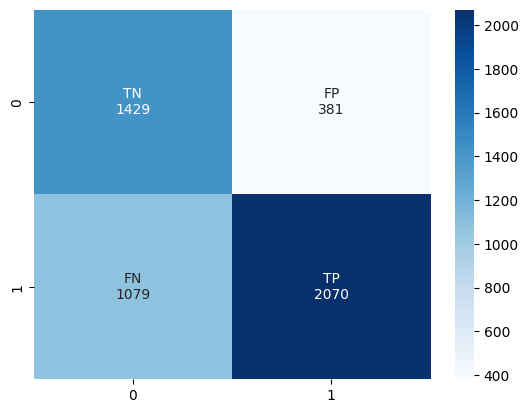

In [97]:
cnf_matrix = confusion_matrix(predicted5,Y_test)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

Finally, for **Logistic Regression**

In [104]:
model6 = LogisticRegression(max_iter=1500)
model6.fit(X_train,Y_train)
predicted6 =model6.predict(X_test)

In [105]:
a = metrics.precision_recall_fscore_support(predicted6, Y_test)

print("Accuracuy Score: ",a)

f1score_model6=2*(a[0][0]*a[1][0])/(a[0][0]+a[1][0])
print("f1Score :",f1score_model6)

Accuracuy Score:  (array([0.86861314, 0.89610911]), array([0.89212828, 0.87333855]), array([0.88021368, 0.88457731]), array([2401, 2558]))
f1Score : 0.8802136839942469


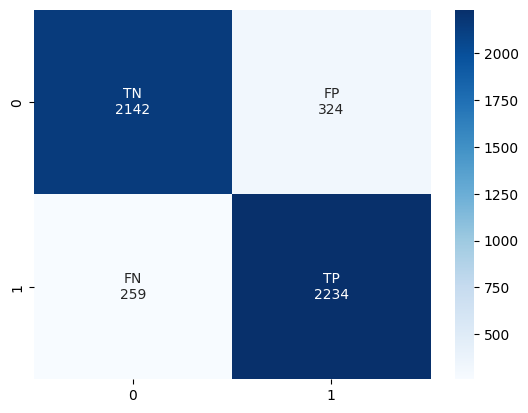

In [106]:
cnf_matrix = confusion_matrix(Y_test,predicted6)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

In [124]:
model_f1scores1=pd.DataFrame({'models':['LinearSupportVector','MultiNomialNaiveBias','DecissionTreeClassifier','RandomForestClassifier','KNearestNeighbours','LogisticRegression'],'f1score':[f1score_model1,f1score_model2,f1score_model3,f1score_model4,f1score_model5,f1score_model6]})
model_f1scores1

,models,f1score
0,LinearSupportVector,0.986613
1,MultiNomialNaiveBias,0.858910
2,DecissionTreeClassifier,0.973061
3,RandomForestClassifier,0.985578
4,KNearestNeighbours,0.638622
5,LogisticRegression,0.880214
